In [135]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


# Part 1 Read and Process Data

In [136]:
# Import packages
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np

In [137]:
# read data
Fraud = pd.read_csv('Fraud_Data.csv')
IP = pd.read_csv('IpAddress_to_Country.csv')

In [138]:
# Check data types
Fraud.dtypes

user_id             int64
signup_time        object
purchase_time      object
purchase_value      int64
device_id          object
source             object
browser            object
sex                object
age                 int64
ip_address        float64
class               int64
dtype: object

In [139]:
# check if IP address is unique
Fraud[Fraud.duplicated(['ip_address'], keep=False)]

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
24,171711,2015-01-11 01:51:15,2015-01-11 01:51:16,52,YPLQGKBAAULUV,Direct,IE,F,35,1.120619e+09,1
29,151705,2015-01-07 03:44:53,2015-01-07 03:44:54,48,URHCRIXOMLJMH,SEO,Chrome,F,27,2.836025e+09,1
64,181004,2015-01-07 17:45:16,2015-01-07 17:45:17,10,WETYPHOQVLWMK,Ads,FireFox,M,36,2.293333e+09,1
77,392706,2015-01-07 08:15:53,2015-01-07 08:15:54,65,VRYLIRAQJIIIE,SEO,Opera,F,30,1.213105e+09,1
83,67592,2015-01-10 23:23:25,2015-01-10 23:23:26,38,ITUMJCKWEYNDD,Ads,Safari,M,43,3.874758e+09,1
111,352206,2015-01-06 21:48:13,2015-01-06 21:48:14,45,FRITFBEXOSJEI,Ads,IE,F,22,1.367518e+09,1
134,104061,2015-01-05 00:09:57,2015-01-05 00:09:58,23,XSEQHFFOYFICY,SEO,IE,M,33,2.011989e+09,1
141,348260,2015-01-10 17:13:50,2015-01-10 17:13:51,18,VOQAAYLLJLUII,SEO,Safari,M,27,7.989386e+08,1
160,121703,2015-01-06 08:56:42,2015-01-06 08:56:43,28,XAVNTONBKCVJS,Direct,Safari,M,34,2.890012e+09,1


In [140]:
# check if data contain missing value
Fraud.isnull().values.any()

False

In [141]:
# create a dictionary to store ip address, use the range of lower and upper bond as the key
IP['IpRange'] = list(zip(IP['lower_bound_ip_address'], IP['upper_bound_ip_address']))
del IP['lower_bound_ip_address']
del IP['upper_bound_ip_address']
IpDic = IP.set_index('IpRange').to_dict().get('country')

In [142]:
# extract a sample to write code first
Fraud = Fraud.sample(20000)

In [143]:
# Method to locate the key by a value
def get_rate(dic, value):
    for key in dic:
        if key[0] <= value <= key[1]:
            return dic[key]

In [ ]:
# locate country by IP address
Fraud['country'] = 0
for index, ip in enumerate(Fraud['ip_address']):
    Fraud['country'][index] = get_rate(IpDic, ip)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [ ]:
writer = pd.ExcelWriter('IPCombine.xlsx')
Fraud.to_excel(writer,'Sheet1')
writer.save()

In [ ]:
# summary country distributions
Fraud['country'].value_counts()

##### Conclusion:
1. We have duplicated IP addresses
2. Some IP addresses cannot be located to a known country

# Part 2 Build Machine Learning Model 

Before jumping into building a model, think about whether you can create new powerful variables. This is called feature engineering and it is the most important step in machine learning. However, feature engineering is quite time consuming. In a take-home you should just give an idea of how you would do it and emphasize that with more time you would go deeper into it.

A few obvious variables that can be created here could be:
1. Time difference between sign-up time and purchase time
2. If the device id is unique or certain users are sharing the same device (many different user ids using the same device could be an indicator of fake accounts)
3. Same for the ip address. Many different users having the same ip address could be an indicator of fake accounts
4. Usual week of the year and day of the week from time variables

In [119]:
# Read data
Fraud = pd.read_excel('IPCombine.xlsx')

In [121]:
Fraud

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country
71934,57423,2015-07-15 10:25:30,2015-07-16 18:01:56,38,JWUWNWLAQANLG,SEO,Chrome,M,31,2.665002e+08,0,0
132039,375291,2015-05-26 08:21:38,2015-09-06 23:00:34,20,KBOGIDLGOAAOD,Ads,IE,F,51,2.874066e+09,0,0
139289,337118,2015-03-11 02:21:39,2015-05-06 02:02:02,15,HDHCJLLLZPDJJ,Direct,Safari,M,37,2.690635e+09,0,0
75321,183604,2015-04-02 12:53:18,2015-05-16 11:33:10,60,YIZWPMIATXROM,SEO,IE,M,36,2.436684e+09,0,0
8310,260945,2015-06-24 08:42:05,2015-07-01 14:21:11,54,YTFJBEHMOTXUM,SEO,IE,F,29,4.285129e+08,0,0
120210,311226,2015-03-02 19:56:21,2015-04-25 06:59:55,21,NBOMYAIAORPQK,Ads,FireFox,M,45,7.083557e+08,0,0
92013,118493,2015-02-21 20:09:41,2015-06-03 19:02:14,44,VGOFLICKBNIWT,Ads,FireFox,M,24,3.724486e+08,0,0
42789,16133,2015-01-06 21:15:50,2015-02-03 11:45:32,40,LSPKMBDJHUIXL,SEO,Chrome,M,47,6.054872e+07,0,0
66503,65168,2015-01-20 10:54:40,2015-04-20 19:44:40,14,VJKEKZCWVTCTC,SEO,FireFox,M,27,5.094951e+07,1,0
114457,137301,2015-01-14 20:10:22,2015-04-08 05:10:08,22,YHTEWJYVHPSVN,Direct,IE,F,41,1.574504e+09,0,0


In [122]:
# convert time to correct datatype
Fraud['signup_time'] =  pd.to_datetime(Fraud['signup_time'], format='%Y-%m-%d %H:%M:%S')
Fraud['purchase_time'] =  pd.to_datetime(Fraud['purchase_time'], format='%Y-%m-%d %H:%M:%S')

# calculate time differences between sign up and purchase
Fraud['time_diffrence'] = (Fraud['purchase_time'] - Fraud['signup_time']).astype('timedelta64[h]')

In [123]:
# check for each device id how many different users had it
Fraud[['device_id', 'user_id']].groupby('device_id').count().reset_index().sort_values(by=['user_id'], ascending=False).head(10)

,device_id,user_id
17422,XJWEQEWCBRAKD,6
9901,NLHIFYKLVREAI,6
15148,ULGTRBHXSTOEV,5
425,AOYKKKGMZDLSJ,5
11601,PSEKFFVDGQBAL,5
13625,SKHXGGVKUSMWO,5
7547,KEQVDINWCZMWA,5
17360,XHZBVWFWHSGTQ,5
13247,RXQZGFTDADHHQ,5
12143,QKYBDKNISUYVP,4


In [124]:
# check for each ip address how many different users had it
Fraud[['ip_address', 'user_id']].groupby('ip_address').count().reset_index().sort_values(by=['user_id'], ascending=False).head(10)

,ip_address,user_id
8112,1.800089e+09,6
4392,9.794124e+08,6
15071,3.343852e+09,5
10178,2.249217e+09,5
6698,1.462236e+09,5
3028,6.473124e+08,5
4637,1.028278e+09,5
12034,2.647793e+09,5
11040,2.423003e+09,5
14342,3.176578e+09,4


In [125]:
# day of the week
Fraud['signup_time_wd'] = Fraud['signup_time'].dt.weekday
Fraud['purchase_time_wd'] = Fraud['purchase_time'].dt.weekday

In [126]:
# week of the yr
Fraud['signup_time_wy'] = Fraud['signup_time'].dt.week
Fraud['purchase_time_wy'] = Fraud['purchase_time'].dt.week

In [129]:
Fraud

,purchase_value,source,browser,sex,age,ip_address,class,country,time_diffrence,signup_time_wd,purchase_time_wd,signup_time_wy,purchase_time_wy
71934,38,SEO,Chrome,M,31,2.665002e+08,0,0,31.0,2,3,29,29
132039,20,Ads,IE,F,51,2.874066e+09,0,0,2486.0,1,6,22,36
139289,15,Direct,Safari,M,37,2.690635e+09,0,0,1343.0,2,2,11,19
75321,60,SEO,IE,M,36,2.436684e+09,0,0,1054.0,3,5,14,20
8310,54,SEO,IE,F,29,4.285129e+08,0,0,173.0,2,2,26,27
120210,21,Ads,FireFox,M,45,7.083557e+08,0,0,1283.0,0,5,10,17
92013,44,Ads,FireFox,M,24,3.724486e+08,0,0,2446.0,5,2,8,23
42789,40,SEO,Chrome,M,47,6.054872e+07,0,0,662.0,1,1,2,6
66503,14,SEO,FireFox,M,27,5.094951e+07,1,0,2168.0,1,0,4,17
114457,22,Direct,IE,F,41,1.574504e+09,0,0,2000.0,2,2,3,15


In [128]:
# drop columns [0,1,2,4]
Fraud.drop(Fraud.columns[[0,1,2]], axis=1, inplace=True)
Fraud.drop(Fraud.columns[[1]], axis=1, inplace=True)

In [130]:
# Replace None value with value
Fraud['country'].fillna(value='Not Found', inplace = True)

In [131]:
#just keep the top 50 country, everything else is "other" ..... not sure what top 50 means
Top50Country = Fraud.groupby(['country']).size().sort_values(ascending=False).nlargest(50).index.values.tolist()
Fraud.loc[~Fraud['country'].isin(Top50Country), 'country'] = 'Other'

In [132]:
Fraud.dtypes

purchase_value        int64
source               object
browser              object
sex                  object
age                   int64
ip_address          float64
class                 int64
country               int64
time_diffrence      float64
signup_time_wd        int64
purchase_time_wd      int64
signup_time_wy        int64
purchase_time_wy      int64
dtype: object

In [133]:
# Decode country and browser 
Fraud = pd.get_dummies(Fraud)

In [107]:
# convert class as category
# Fraud['class'] = Fraud['class'].astype('category')

In [108]:
# split dataset into train data and test data
train, test = train_test_split(Fraud, test_size=0.34)

x_train = train.loc[:, train.columns != 'class'].copy()
y_train = train.loc[:, train.columns == 'class'].copy()
x_test = train.loc[:, test.columns != 'class'].copy()
y_test = train.loc[:, test.columns == 'class'].copy()

In [118]:
Fraud

,purchase_value,age,ip_address,class,country,time_diffrence,signup_time_wd,purchase_time_wd,signup_time_wy,purchase_time_wy,source_Ads,source_Direct,source_SEO,browser_Chrome,browser_FireFox,browser_IE,browser_Opera,browser_Safari,sex_F,sex_M
71934,38,31,2.665002e+08,0,0,31.0,2,3,29,29,0,0,1,1,0,0,0,0,0,1
132039,20,51,2.874066e+09,0,0,2486.0,1,6,22,36,1,0,0,0,0,1,0,0,1,0
139289,15,37,2.690635e+09,0,0,1343.0,2,2,11,19,0,1,0,0,0,0,0,1,0,1
75321,60,36,2.436684e+09,0,0,1054.0,3,5,14,20,0,0,1,0,0,1,0,0,0,1
8310,54,29,4.285129e+08,0,0,173.0,2,2,26,27,0,0,1,0,0,1,0,0,1,0
120210,21,45,7.083557e+08,0,0,1283.0,0,5,10,17,1,0,0,0,1,0,0,0,0,1
92013,44,24,3.724486e+08,0,0,2446.0,5,2,8,23,1,0,0,0,1,0,0,0,0,1
42789,40,47,6.054872e+07,0,0,662.0,1,1,2,6,0,0,1,1,0,0,0,0,0,1
66503,14,27,5.094951e+07,1,0,2168.0,1,0,4,17,0,0,1,0,1,0,0,0,0,1
114457,22,41,1.574504e+09,0,0,2000.0,2,2,3,15,0,1,0,0,0,1,0,0,1,0


In [109]:
# Train Model
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

# Predict Result
y_predict = clf.predict(x_test)
y_Predict_Proba = clf.predict_proba(x_test)[:,1]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [110]:
y_test['class'].value_counts()

0    11986
1     1213
Name: class, dtype: int64

In [112]:
# Helper function to get AUC plot
def model_evaluation(y_test,y_pred,model='',plot=True):
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
    auc = metrics.auc(fpr, tpr)
    if plot:
        plt.figure()
        lw = 2
        plt.plot(fpr, tpr, color='darkorange',
                 lw=lw, label='ROC curve (area = %0.4f)' % auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(model+' Model - Plot ROC over Validation Dataset')
        plt.legend(loc="lower right")
        plt.show()
    else: 
        print("AUC Score (Validation): %f" % auc)

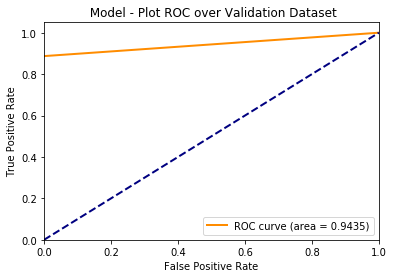

In [113]:
model_evaluation(y_test,y_predict, plot=True)

In [114]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_Predict_Proba, pos_label=1)
ROC_score = metrics.auc(fpr, tpr)
print('ROC Score is: ', ROC_score)

ROC Score is:  0.999954776863


In [115]:
list(zip(x_test.columns, clf.feature_importances_))

[('purchase_value', 0.061857462357079097),
 ('age', 0.0530793486047373),
 ('ip_address', 0.07156356691955984),
 ('country', 0.0),
 ('time_diffrence', 0.33912266853148243),
 ('signup_time_wd', 0.028895938052972962),
 ('purchase_time_wd', 0.036060475311986764),
 ('signup_time_wy', 0.13528010095184101),
 ('purchase_time_wy', 0.20400548212601324),
 ('source_Ads', 0.0085900725536574123),
 ('source_Direct', 0.0061948142398589815),
 ('source_SEO', 0.0062044832768114152),
 ('browser_Chrome', 0.0091351560884461967),
 ('browser_FireFox', 0.0066918803535297349),
 ('browser_IE', 0.0067345476471635385),
 ('browser_Opera', 0.0014713533165550412),
 ('browser_Safari', 0.0075588818884704465),
 ('sex_F', 0.0091291081539451834),
 ('sex_M', 0.0084246596258893899)]

In [77]:
np.mean(y_test['class'] == y_predict)

0.98878617972420069